# Assignment 1

This assignment is due on __Sunday March 17, by 11:59PM__. It pertains to content taught in classes 1-3. 

This assignment should be completed in Python, and an PDF file should be submitted, containing both code and written answers. If you like, you may create your own Jupyter Notebook file from scratch, but it is likely easier to modify this one.

Please do not be intimidated by the apparent length of this assignment (it is deceiving!). All required code is a single line. Questions that require identification and/or intepretation will not penalized for brevity of response: if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in class. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to tutorial. We will work with you through the issue.

If you like, you may collaborate with others in the class. If you choose to do so, please indicate with whom you have worked at the top of your PDF. Separate submissions are required.

Any questions can be addressed to Kamilah ([kamilah.ebrahim@mail.utoronto.ca]()) and/or Ananya ([ananya.jha@mail.utoronto.ca]()) and/or Vishnou ([vishnouvina@cs.toronto.edu]()) before the due-date. Please submit your assignments through your Drive Folder.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

_(ii)_ What concept ‘defines’ the plotted line?

(i) medv is the median value of owner home. Dis is the weighted mean distance to 5 Boston employement

(ii) plotted line defines a positive relationship between home value and distance to employment center.

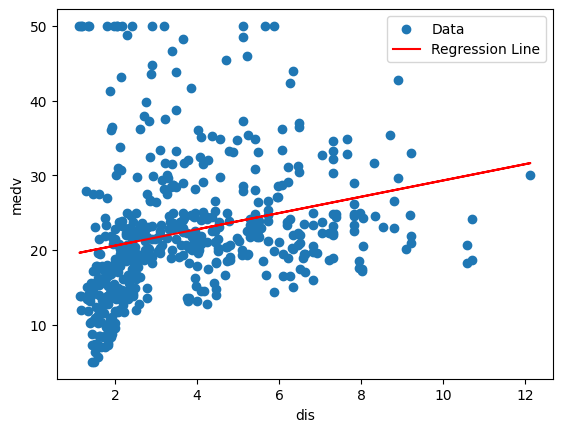

In [4]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

(iii) null hypothesis is distance to employment has no relation to house price, alternative hypothesis is the otherwise.

In [5]:
# Add your code here
y = Boston['medv']

x = Boston['dis']
x = sm.add_constant(x) 
model = sm.OLS(y, x) # to specify the model
results = model.fit() 

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  

Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

In [6]:
results.summary()

# v. coefficient estinmate for B0 and B1 are 18.3 and 1.09
# vi. B0 and B1 std err is 0.817 and 0.188
# vii. 
# viii. It is not a good fit. R^2 is only 0.06


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        00:54:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [7]:
# Add your code here


y = Boston['medv']
X = MS(['dis', 'rm']).fit_transform(Boston)
model2 = sm.OLS (y, X)
results2 = model2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.84e-75
Time:                        00:54:49   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.000     -39.786     -29.486
dis            0.4888      0.141      3.459      0.001       0.211       0.767
rm             8.8014      0.424     20.780      0.000       7.969       9.634
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

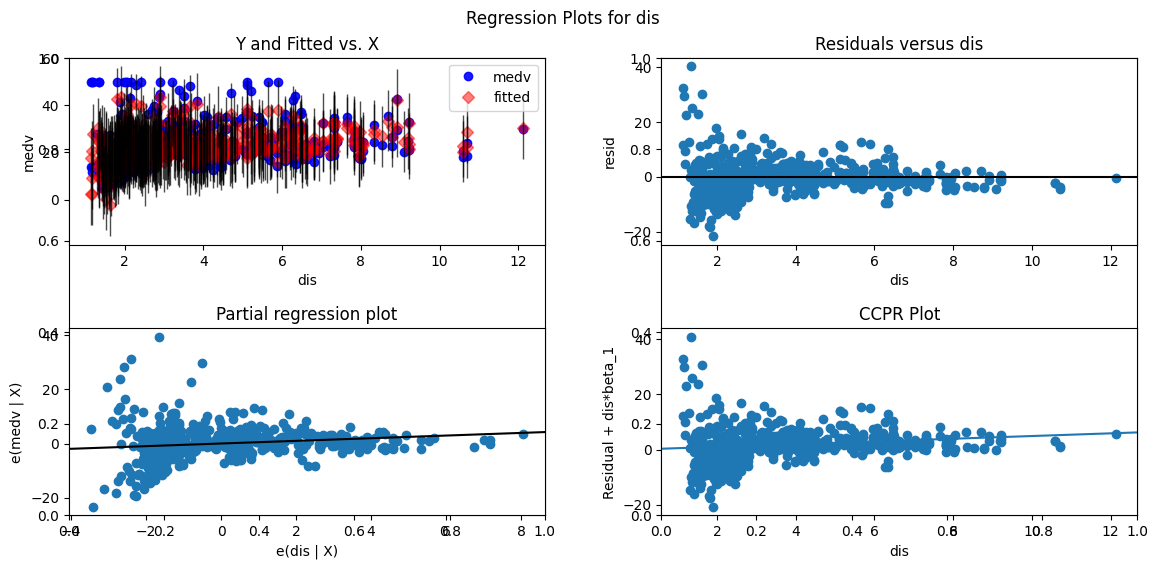

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figure size as needed

# Plot the diagnostic plots using plot_regress_exog
# The second parameter 'dis' is the name of the independent variable to plot against
sm.graphics.plot_regress_exog(results2, 'dis', fig=fig)  # Plotting Residuals vs. Fitted

# Show the plot
plt.show()

In [ ]:
# Add your code here
#ii. Null hypothesis: there is no relationship between average room, distance from employment center to house price. 
#Alternative hypothesis: there is some relationship between average room, distance to employment to house price

#ii 

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [ ]:
# Add your code here

### Question 3: Classification using KNN

We'll now use the `Caravan` dataset from the `ISLP` package. (You may use `Caravan.describe()` to review details of the dataset.) In this dataset, the response variable of interest is `Purchase`, which indicates if a given customer purchased a caravan insurance policy. We will simultaneously use all other variables in the dataset to predict the response variable.

In [10]:
# Load the "Caravan" dataset using the "load_data" function from the ISLP package
Caravan = load_data('Caravan')

# Add your code here

Caravan.describe()

MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      0.696496     4.626932     1.069907     3.258502     6.183442  ...   
std       1.003234     1.715843     1.017503     1.597647     1.909482  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     4.000000     0.000000     2.000000     5.000000  ...   
50%       0.000000     5.000000     1.000000     3.000000     6.000000  ...   
75%       1.000000     6.000000     2.000000     4.000000     7.000000  ...   
max       9.000000     9.000000     5.000000     9.000000     9.000000  ...   

            ALEVEN     APERSONG      AGEZONG      AWAOREG       ABRAND  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      0.076606     0.005325     0.006527     0.004638     0.570079   
std       0.377569     0.072782     0.080532     0.077403     0.562058   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     1.000000   
75%       0.000000     0.000000     0.000000     0.000000     1.000000   
max       8.000000     1.000000     1.000000     2.000000     7.000000   

           AZEILPL     APLEZIER       AFIETS      AINBOED     ABYSTAND  
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  
mean      0.000515     0.006012     0.031776     0.007901     0.014256  
std       0.022696     0.081632     0.210986     0.090463     0.119996  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     2.000000     3.000000     2.000000     2.000000  

[8 rows x 85 columns]

Before fitting any model, it is essential to understand our data. Answer the following questions about the `Caravan` dataset (Hint: use `print` and `describe`):  
_(i)_ How many observations (rows) does the dataset contain?    
_(ii)_ How many variables (columns) does the dataset contain?    
_(iii)_ What 'variable' type is the response variable `Purchase` (e.g., 'character', 'factor', 'numeric', etc)? What are the 'levels' of the variable?    
_(iv)_ How many predictor variables do we have (Hint: all variables other than `Purchase`)?  

In [ ]:
# Add your code here

#5822 rows and 86 columns
# Yes and no
# 85 variables



Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the `scaler` method, provided as follows:

In [12]:
# Select predictors (excluding the 86th column)
predictors = Caravan.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK    MGODPR  \
0  0.680906  -0.27258  0.406697 -1.216964  0.779405 -0.694311  0.217444   
1  0.992297  -0.27258 -0.859500 -1.216964  0.779405  0.302552 -0.365410   
2  0.992297  -0.27258 -0.859500 -1.216964  0.779405 -0.694311 -0.365410   
3 -1.187437  -0.27258  0.406697  0.010755 -0.970980  1.299414 -0.948264   
4  1.225840  -0.27258  1.672893 -1.216964  1.479559  0.302552 -0.365410   

     MGODOV    MGODGE    MRELGE  ...   ALEVEN  APERSONG   AGEZONG  AWAOREG  \
0 -0.068711 -0.161816  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   
1 -0.068711  0.464159 -0.096077  ... -0.20291 -0.073165 -0.081055 -0.05992   
2  0.914172  0.464159 -1.667319  ... -0.20291 -0.073165 -0.081055 -0.05992   
3  0.914172  0.464159 -0.619824  ... -0.20291 -0.073165 -0.081055 -0.05992   
4 -0.068711  0.464159  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   

     ABRAND   AZEILPL  APLEZIER   AFIETS   AINBOED  ABYSTAND  
0  0.764971 -0.02

_(v)_ Why is it important to standardize the predictor variables?  
_(vi)_ Why did we elect not to standard our response variable `Purchase`?  

_(vii)_ A second essential step is to set a random seed. Do so below (Hint: use the `random.seed` function). Why is setting a seed important? Is the particular seed value important? Why or why not?

In [ ]:
# Add your code here
#KNN is based on euclidean dist. Variables with large ranges/magnitudes will influence distance calculation and standardization fixes it.

# Purchase is factor, cannot be standardise

# random seed make sure the scenario can be reproduced


_(viii)_ A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. Extend the code to create a non-overlapping test set for the predictors and response variables.

In [13]:
# Create a random vector of True and False values
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
training_X = predictors_standardized[split]

# Define the training set for Y (response)
training_Y = Caravan.loc[split, 'Purchase']

# Define the testing set for X (predictors)
testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
testing_Y = Caravan.loc[~split, 'Purchase']


_(ix)_ We are finally set to fit the KNN model. In Python, we can use the `KNeighborsClassifier()` function. Fit the KNN with k=1. (You may review arguments to knn by typing `help(knn.fit)`). 

In [14]:
# Add your code here

from sklearn.neighbors import KNeighborsClassifier
from ISLP import confusion_table

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(training_X, training_Y)
knn1_pred = knn1.predict(testing_X)
confusion_table(knn1_pred, testing_Y)


Truth        No  Yes
Predicted           
No         1308   79
Yes          84    7

Using your fit model, answer the following questions:   
_(x)_ What is the prediction accuracy? (Hint: use the `score` method, and compare your model to `testing_Y`)  
_(xi)_ What is the predictor error ? (Hint: compute it from the accuracy)

In [15]:
# prediction accuracy rate
np.mean(knn1_pred == testing_Y)
# prediction error rate
np.mean(knn1_pred != testing_Y)

0.11028416779431664

_(xii)_ How does this prediction error/accuracy compare to what could be achieved via random guesses? To answer this, consider the percent of customers in the `Caravan` dataset who actually purchase insurance, computed below:

In [ ]:
# Calculate the percentage of customers who purchase insurance
percentage_purchase = (Caravan['Purchase'].eq('Yes').sum() / len(Caravan['Purchase'])) * 100

print(percentage_purchase)

_(xiii)_ Fit a second KNN model, with $K=3$. Does this model perform better (i.e., have higher accuracy, compared to a random guess)?